In [1]:
# SVM
# fit as many instances as possible while limiting margin violation
# within the epilson, upper and lower bound, find the line that fit most instances
# SVM is to find the function that we use to generate the training set
# it produces a vector
# the vector represents the hyperplane
# vectors close to test points are called support vectors
# linear regression is to minimize the error.  SVM makes sure the error doesn't exceed a threshold

In [2]:
# build SVM
# 1.  training set
# 2.  kernel
# 3.  correlation matrix K
# 4.  train, contraction coefficients
# 5.  create estimator


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [5]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = y.reshape((-1,1))
y = sc_y.fit_transform(y)


C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
from sklearn.svm import SVR
# 
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
#sample_x = [6.5]
#sample_x = np.array([sample_x])
#sample_x = sample_x.reshape(-1, 1)
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))
y_pred = sc_y.inverse_transform(y_pred)
print(y_pred)

[170370.0204065]


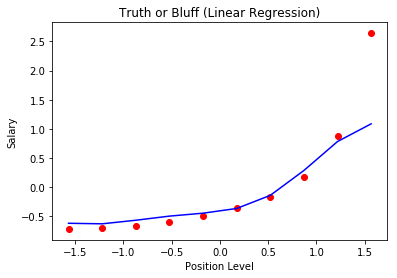

In [8]:
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


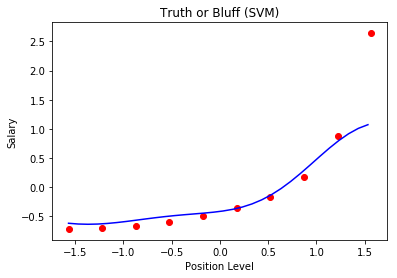

In [9]:
# modify X, so that it increments by 0.1 per step
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
# so that adapt to any new datasets, not just X
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Truth or Bluff (SVM)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()